In [19]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random as random
import time
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint

k = 0.3
omega = 1.25
gamma = 0.37
alpha=1.0
beta=-1.0


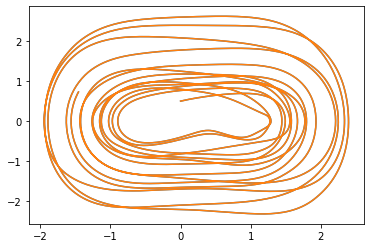

In [245]:
def f (t,x):
    k=0.1
    β = 0.5* abs (np.sin(t))
    
    return np.dot(np.array([[0,1],[-k*x[1] +β*x[0]- 0.5*x[0]**2,0]]), x) + [0,0.2*np.cos(t)]
    
fig, ax = plt.subplots()

t_eval = np.linspace(0,100,5000)
sol = []
for i in range (1):    
    sol.append(solve_ivp(f,[0,100], [0,0.5],t_eval=t_eval))
    ax.plot(sol[i].y[0],sol[i].y[1])
    
    sol.append(solve_ivp(f,[0,100], [0,0.49],t_eval=t_eval))
    
    ax.plot(sol[i].y[0],sol[i].y[1])
    
# ax.set_ylim(-4,4)
# ax.set_xlim(-4,4)

# plt.show()


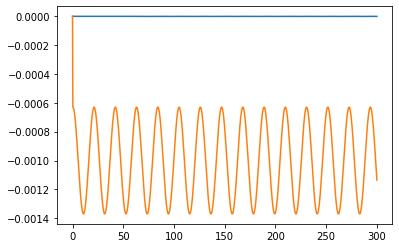

In [10]:
k = 0.5
ω = 0.3
γ = 0.37
α = 0.5
β = -.2

def βt (t):
    return 0.2 * np.cos(t)

def βx(x):
    return 0.3 * np.cos(x)

def driving(t):
    return  γ*np.cos(ω*t)


m = 1
x = [0]
v = [0]
a = [1]
dt = 5/5000

t = np.linspace(0,300,1000)

    
for i in range (len(t)):
    a.append( -β*v[-1]  -k*x[-1]  - α*v[-1]**3 + driving(t[i]))
    v.append(v[-1] + (a[-1] - a[-2] )* dt)
    x.append (x[-1] + (v[-1]-v[-2]) *dt )

plt.plot(t,x[:-1], )
plt.plot(t,v[:-1])
# plt.plot(t,a[:-1])
# plt.plot(x,v)
ω

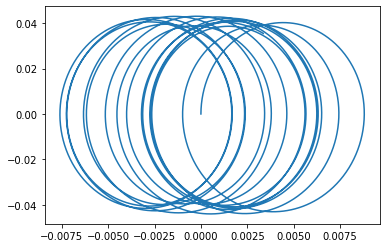

In [3]:
k = 0.5
ω = 0.3
γ = 0.37
α = 0.5
β = .2

def βt (t):
    return 0.2 * np.cos(t)

def βx(x):
    return 0.3 * np.cos(x)

def driving(t):
    return  γ*np.cos(ω*t)


m = 1
x = [0]
v = [0]
a = [1]
dt = 5/5000

t = np.linspace(0,300,10000)

    
for i in range (len(t)):
    a.append( -β*v[-1]  -k*x[-1]  - α*x[-1]**3 + driving(t[i]))
    v.append(v[-1] + a[-1]* dt)
    x.append (x[-1] + v[-1] *dt )

# plt.plot(t,x[:-1], )
# plt.plot(t,v[:-1])
# plt.plot(t,a[:-1])
plt.plot(x,v)

In [31]:
omegaD = 2*np.pi
omega0 = 1.5*omegaD
betaD = omega0/4`
def deriv(f,t,param): # return derivatives of the array f[phi,dphi/dt,theta,dtheta/dt]
    phi = f[0]
    dphidt = f[1]
    gammaD = param[0]
    
    #dphi/dt
    dphidt = dphidt 
    #d2phi/dt2 
    d2phidt2 = gammaD*omega0**2*np.cos(omegaD*t) - 2*betaD*dphidt - omega0**2*np.sin(phi)
    
    return [dphidt,d2phidt2]

def solveDDP(phi0, dphi0 , gammaD , max_time):
    dstep = 0.01
    n_steps = max_time/dstep + 1
    time = np.linspace(0,max_time,int(n_steps))
    yinit = [phi0,dphi0] # initial values
    param = np.array([gammaD])
    f_solun = odeint(deriv,yinit,time,args=(param,))
    return np.array([time,f_solun[:,0],f_solun[:,1]])

Text(0, 0.5, 'ϕ')

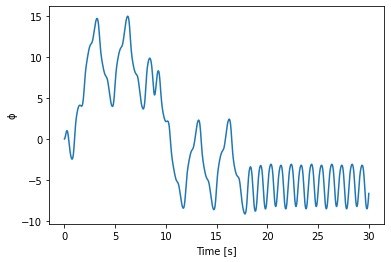

In [55]:
def gamma(s):
    return 1.1 + np.cos(s)/10

solun02 = solveDDP(0,0,gamma,30)
plt.plot (solun02[0],solun02[1])
plt.xlabel('Time [s]')
plt.ylabel('ϕ')

Text(0, 0.5, 'ϕ')

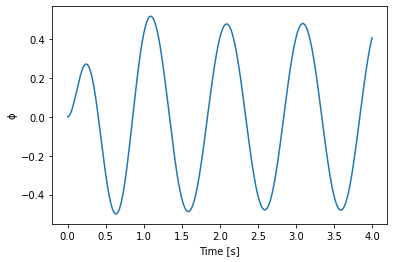